In [1]:
# Libraries:
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Lasso

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # include parent directory in the path
from data import SINDy_data
from data import data
from data import equations

import pysindy as ps
sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.

from toolbox.auxiliary_functions import set_param_freq
from toolbox.symbolic_SINDy import *

# Seed:
np.random.seed(999)

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


In [2]:
# Select ODE & settings:
ode_name = 'OscilVdpODE' # help="name of the ode", type=str
ode_param = '1.,1.,1.' # help="parameters of the ode (default: None)", type=str, default=None
x_id = 0 # help="ID of the equation to be learned", type=int, default=0
freq = 10 # help="sampling frequency", type=float, default=10
freq_SR = 10 # help="sampling frequency", type=float, default=10
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_sigma = 0.05 # help="noise level (default 0)", type=float, default=0.
seed = 100 # help="random seed", type=int, default=0
n_seed = 1 # help="random seed", type=int, default=10

ode_param, freq = set_param_freq(ode_param, freq)

ode = equations.get_ode(ode_name, ode_param)
dt = 1 / freq
dim_x = 2
dim_k = 0
time_vector = np.arange(0, ode.T + dt, dt)
T = ode.T

(50, 160, 2) (50, 160, 2) (0,)
['X0', 'X1']


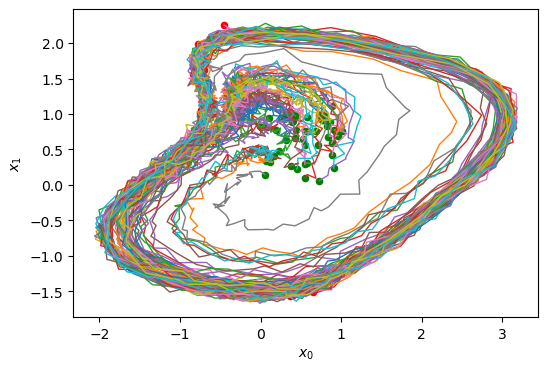

In [3]:
# generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_sigma, dim_x, dim_k)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

# ensure existance conditions:
# X_list = SINDy_data.existence_conditions(X_list, ode.init_low, n_variables=dim_x)

SINDy_data.plot_configuration(X_list, T)

In [4]:
model = symbolic_SINDy(SR_method='SR-T', 
                       x_id=0,
                       degree=3,
                       threshold=0.1,
                       product=True)
model, building_blocks_lambda, _, _, _, _ =  model.call(X_list=X_list, dX_list=dX_list, param_list=param_list,
           feature_names=feature_names, dt=dt, building_blocks_lambda=None, 
           function_names=None, patience=0, lazy=True, ode=ode, ode_name=ode_name,
           ode_param=ode_param, freq_SR=freq_SR, n_sample=n_sample, 
           noise_ratio=noise_sigma, seed=seed, n_seed=n_seed, 
           T0=0, T=10, dim_x=dim_x, dim_k=dim_k)

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(



Best building block:
['sin(3.0723849791795512/X0)']

smart-SINDy model:
(X0)' = 0.179 1 + 1.051 X0 + -0.172 X1 + 0.299 X1^2 + -0.199 X0^2 X1 + -0.927 X0 X1^2 + -0.423 X1^3 + 0.147 X0^2 X1 sin(3.0723849791795512/X0)
(X1)' = 0.998 X0
Model complexity:  9
Lasso penalty:  4.395414296055571
